In [86]:
# 223681886 - Kaushalya Rajapaksha - 3.1P - SIT725
# import diabetes dataset from the sklearn library
# sklearn datasets are pre-processed and ready to use
from sklearn.datasets import load_diabetes
# sklearn preprocessing helps to transformer classes to change raw feature vectors
from sklearn import preprocessing
# using panda library able to get a dataframe with rows and columns out of the diabetes dataset
import pandas as pd

# load the diabetes dataset
# this data set available with information on 442 patient
diabetes = load_diabetes()

In [87]:
# description of diabetes dataset
# display the diabetes dataset shape
# display the number of rows, columns and attribute information
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [88]:
# create the dataframe from diabetes dataset and add columns name to dataset
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
# add diabetes dataset target as column of measure  
df['measure'] = diabetes.target
# show the first 10 rows detailed information of each and every attributes of the dataset
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [95]:
# check for existing null values
total_null_values = sum(df.isnull().sum())
print(total_null_values)

0


In [97]:
# count the number of zero values in each column
print((df[['age','sex','bmi','bp', 's1', 's2', 's3', 's4', 's5', 's6', 'measure']] == 0).sum())

age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
measure    0
dtype: int64


In [94]:
# dataset separated to 80/20 for training and testing
from sklearn.model_selection import train_test_split

# standardize and train/test split of diabetes dataset
diabetes.data = preprocessing.scale(diabetes.data)

# split diabetes dataset to train and test in to random number of 20% testing and 80% training
# test size should be between 0.0 and 1.0
X_train, X_test, Y_train, Y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=5)
# display the traing and testing dataser label and feature details
print(X_train.shape,' is the shape of Training Data Features')
print(Y_train.shape,' is the shape of Training Data Lables')
print(X_test.shape,' is the shape of Testing Data Features')
print(Y_test.shape,' is the shape of Testing Data Lables')

(353, 10)  is the shape of Training Data Features
(353,)  is the shape of Training Data Lables
(89, 10)  is the shape of Testing Data Features
(89,)  is the shape of Testing Data Lables


In [90]:
# impliment the Random Forest Classifier Algorithm
# import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# sklearn.metrics includes score functions
# performance metrics and pairwise metrics and distance computations
import sklearn.metrics as sm
rf_scores = []
# calculate test data scores over 10, 100, 200, 500 and 1000 trees
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state = 42)
    rf_classifier.fit(X_train, Y_train)
    rf_scores.append(rf_classifier.score(X_test, Y_test))
# predictions using test data
Y_pred = rf_classifier.predict(X_test)
Y_pred

# get the accuracy score for dataset
accuracy_score=sm.accuracy_score(Y_test, Y_pred)
# printing the accuaracy score for the test data
print('Accuracy score given for test data:',str(accuracy_score))

Accuracy score given for test data: 0.02247191011235955


<Axes: xlabel='bmi', ylabel='measure'>

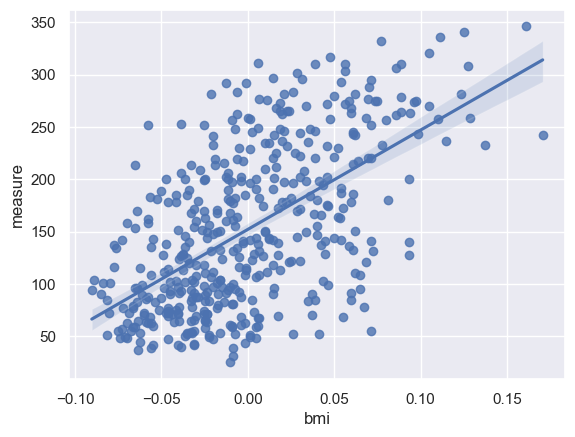

In [91]:
# import statistical graphics library to show graphical details of diabetes bmi and measure(target)
import seaborn as sns
# set the fields to visuallisation 
sns.regplot(x="bmi", y="measure", data=df)